# Bài tập 5

Nguyễn Ngọc Minh Khánh - 1712525

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Câu 1 (1 điểm)

Theo đề bài ta có công thức:

$$\mathbb{E}_{\mathcal{D}}[E_{in}(\mathbf{w}_{lin})] = \sigma^2\left(1-\frac{d+1}{N}\right)$$

- Với $ \sigma = 0.1,  d = 0.8.$.  Ta tiến hành giải phương trình: $ \sigma^2\left(1-\frac{d+1}{N}\right) = 0.008 => N = 45$

- Giá trị N nhỏ nhất để kì vọng $E_{in}$ lớn hơn 0.008 là 100

YOUR ANSWER HERE
- Do đó em chọn đáp án [c]

## Câu 2 (1 điểm)

In [2]:
X = np.random.uniform(-1, 1, (100, 2))
# Giá trị w khởi tạo ứng với câu d
w = [0.01, -1, 1]
y = np.sign(w[0]+w[1]*X[:, 0]**2+w[2]*X[:, 1]**2 )

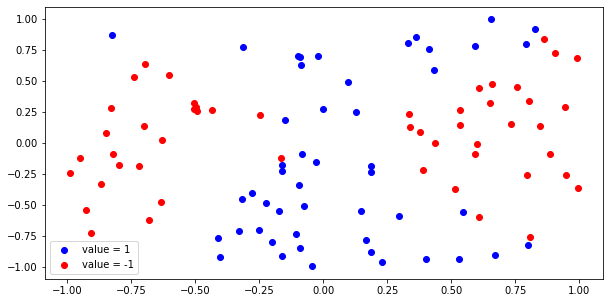

In [3]:
X1 = X[y>0]
X2 = X[y<0]
plt.figure(figsize=(10, 5))
plt.scatter(X1[:, 0], X1[:, 1], c="blue", label = 'value = 1')
plt.scatter(X2[:, 0], X2[:, 1], c="red", label = 'value = -1')
plt.legend()

YOUR ANSWER HERE
- Do đó em chọn đáp án [d]

## Câu 3 (1 điểm)

- Áp dụng kiến thức đã được học về $d_{vc}$ của mô hình phân lớp tuyến tính (Perceptron). Ta có bậc $d_{vc}$ bằng số chiều d+1.
- Số chiều trong phép biến đổi trên là 14 => $d_{vc} = 15$ => giá trị nhỏ nhất mà không nhỏ hơn 15 là 15

YOUR ANSWER HERE
- Do đó em chọn đáp án [c]

## Câu 4 (1 điểm)

$$ \frac{\partial E}{\partial u} = 2(ue^v - 2ve^{-u})(ue^v-2ve^{-u})^{'} = 2(ue^v - 2ve^{-u})(e^v+2ve^{-u})$$

YOUR ANSWER HERE
- Do đó em chọn đáp án [e]

## Câu 5 (1 điểm)

In [4]:
def E_in(u, v):
    '''
    Loss function
    
    Paramaters:
    --------------
    u: float
    v: float
    '''
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

def derivative_u(u, v):
    '''
    deriavative in u direction
    
    Paramaters:
    ----------------
    u: float
    v: float
    '''
    return 2*(u*np.exp(v) - 2*v*np.exp(-u))*(np.exp(v) + 2*v*np.exp(-u))

def derivative_v(u, v):
    '''
    deriavative in u direction

    Paramaters:
    ----------------
    u: float
    v: float
    '''
    return 2*(u*np.exp(v) - 2*v*np.exp(-u))*(u*np.exp(v) - 2*np.exp(-u))

In [5]:
N = 50
u, v = 1, 1
learing_rate = 0.1
for i in range(N):
    E = E_in(u,v)
    if E<10**-14:
        break
    u_update = u - learing_rate*derivative_u(u, v)
    v_update = v - learing_rate*derivative_v(u, v)
    
    u=u_update
    v=v_update
    
print("The number of iterations:",  i)

The number of iterations: 10


YOUR ANSWER HERE
- Do đó em chọn đáp án [d]

## Câu 6 (1 điểm)

In [6]:
print("The value of u: ", u)
print("The value of v: ", v)

The value of u:  0.04473629039778207
The value of v:  0.023958714099141746


YOUR ANSWER HERE
- Do đó em chọn đáp án [e]

## Câu 7 (1 điểm)

In [7]:
N = 15
u, v = 1, 1
learing_rate = 0.1
for i in range(N):
    E = E_in(u,v)
    u = u - learing_rate*derivative_u(u, v)
    v = v - learing_rate*derivative_v(u, v)
    
    
print(E)

0.14782952252409787


YOUR ANSWER HERE
- Do đó em chọn đáp án [a]

## Câu 8 (1 điểm)

In [8]:
def dataset(N, target_w):
    """
    Generates a data set by generating inputs and then using target weight  generate the corresponding outputs
    
    Paramaters:
    ----------
    N: int
       the number of examples.
    target_w: numpy array, shape (3, 1)
              the vector of paramaters of f
    
    Returns:
    ------------
    X: numpy array, shape(N, 3)
       The matrix of input vectors
    Y: numpy array, shape(N, 1)
       The vector of outputs
    """
    bad_data = True # `bad_data = True` means: data contain points on the target line 
                    # (this rarely happens, but just to be careful)
                    # -> y's of these points = 0 (with np.sign); 
                    #    we don't want this (y's of data must be -1 or 1)
                    # -> re-generate data until `bad_data = False`
    while bad_data==True:
        X = np.random.uniform(-1, 1, (N, 2))
        X = np.hstack((np.ones((N, 1)), X))
        Y = np.sign(X@target_w)
        if 0 not in Y:# good data
            bad_data = False
            
    return X, Y

In [9]:
def generate_target_w():
    """
    Generates target_w (the vector of parameters of f) 
    from two random, uniformly distributed points in [-1, 1] x [-1, 1].
    
    Returns
    -------
    target_w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    """
    # Generate two points from a uniform distribution over [-1, 1]x[-1, 1]
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    # Compute the target W from these two points
    target_w = np.array([p1[1]*p2[0] - p1[0]*p2[1], p2[1] - p1[1], p1[0] - p2[0]]).reshape((-1, 1))
    
    return target_w

In [10]:
class LogisticRegression():
    """
    Logistic Regression algorithm
    
    Paramaters:
    y: label corresponding to every row of X, (N, 1)
    X: data set (N, 3)
    w: weights (3, 1)
    """
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        
    def run(self):
        learing_rate = 0.01
        X = self.X
        Y = self.Y
        w = np.zeros((3, 1))
        n_epochs = 1
        N = X.shape[0]
        while(True):
            rand_idxs =np.random.permutation(N)
            w_previous = w.copy()
            for idx in rand_idxs:
                X_point = X[idx].reshape(-1, 3)
                y_point = Y[idx].reshape(1, -1)
                y_predict = 1/(1+np.exp(y_point*(X_point@w)))
                w =  w + (learing_rate*((y_point*X_point.T)@y_predict))

            n_epochs+=1
            if np.linalg.norm(w-w_previous)<0.01:
                return w, n_epochs

In [11]:
def main(num_iter = 100, n_point = 100):
    avg_E_out = 0
    avg_epochs = 0
    for i in range(10):
        target_w = generate_target_w() # generate w_target
        X, y = dataset(100, target_w) # generate dataset
        logistic = LogisticRegression()
        logistic.fit(X, y)
        w, n_epochs = logistic.run()

        #E_out
        X_test, y_test = dataset(100, target_w) # generate data for testing
        E_out = np.mean(np.log(1+np.exp(-y_test*(X_test@w))), axis = 0) # cross entropy error
        
        avg_E_out+=E_out[0]/10
        avg_epochs+= n_epochs/10   
    return avg_E_out, avg_epochs  

In [12]:
E_out, num_of_epochs = main()
print("     E_out:", E_out)

     E_out: 0.09290468511968132


YOUR ANSWER HERE
- Do đó em chọn đáp án [d]

## Câu 9 (1 điểm)

In [13]:
print("-------------")
print("     The number of iterations:", num_of_epochs)

-------------
     The number of iterations: 340.20000000000005


YOUR ANSWER HERE
- Do đó em chọn đáp án [a]

## Câu 10 (1 điểm)

- Với PLA:
    - Với mẫu $\left(\mathbf{x}^{(n)}, y^{(n)}\right)$ được phân lớp đúng thì $\mathbf{w}$ không thay đổi.
    - Với mẫu $\left(\mathbf{x}^{(n)}, y^{(n)}\right)$ bị phân lớp sai thì cập nhật: $\mathbf{w} \leftarrow \mathbf{w} + y^{(n)}\mathbf{x}^{(n)}$.
    
- Với SGD: 
    - với mỗi mẫu $\left(\mathbf{x}^{(n)}, y^{(n)}\right)$ thì đều cập nhật $\mathbf{w} \leftarrow \mathbf{w} - \alpha \times \mathbf{\nabla_wE_{in}}$.
    
- Ở đây mục tiêu là ta tìm 1 hàm lỗi để có xem PLA như là SGD.
    - Với PLA thì ta có thể xem learning rate bằng 1. Vậy có thể xem PLA như SGD khi $-\mathbf{\nabla_wE_{in}} = y^{(n)}\mathbf{x}^{(n)}$ => Ta có $ E_{in} = -y_n\mathbf{w}^T\mathbf{x}_{n} $
    - Với SGD ta phải duyệt qua hết tất cả các điểm, bất chấp điểm đó có bị phân lớp sai hay không nếu xét theo PLA. Một điểm được gọi là phân lớp sai khi giá trị thực tế khác với giá trị dự đoán hay tích của chúng <0 (-1\*1<0 or 1\*-1<0). Vậy thuật toán PLA chỉ cập nhật lại w với những điểm bị phân lớp sai, và giữ nguyên w ở những điểm phân lớp đúng. => Nếu $ y_n\mathbf{w}^T\mathbf{x}_{n} $ >0 thì là phân lớp đúng và không cập nhật lại w ( ${w}^T\mathbf{x}_{n}$ là giá trị dự đoán )
    
        - => Hàm độ lỗi để PLA như là SGD là $$-min(0, y_n\mathbf{w}^T\mathbf{x}_{n} )$$

YOUR ANSWER HERE
- Do đó em chọn đáp án [e]